<a href="https://colab.research.google.com/github/FatemaTabassum/Deep-and-Reinforcement-Learning/blob/master/HW3_Prob_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import mean
from numpy import std
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import KFold
from keras.optimizers import SGD
import tensorflow as tf
import keras
from keras.models import Model


In [16]:
print(tf.__version__)

1.15.0


In [0]:
def data_loader():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    print(X_test.shape)
    return X_train, y_train, X_test, y_test

def reshape_data(X_train, y_train, X_test, y_test):
    #reshape data to fit model
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    
    #One hot-encode target column
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

def baseline_model():
    #create model
    model = Sequential()
    #add model layers
    model.add(Conv2D(32, kernel_size=5, activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=5, activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model







conv2d_1






(5, 5, 1, 32)


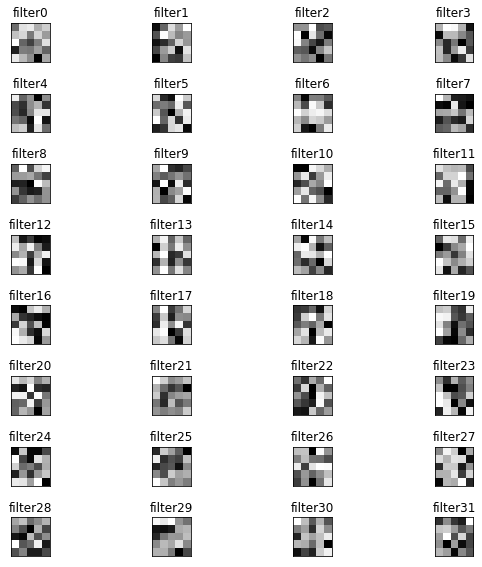

conv2d_2
(5, 5, 32, 32)


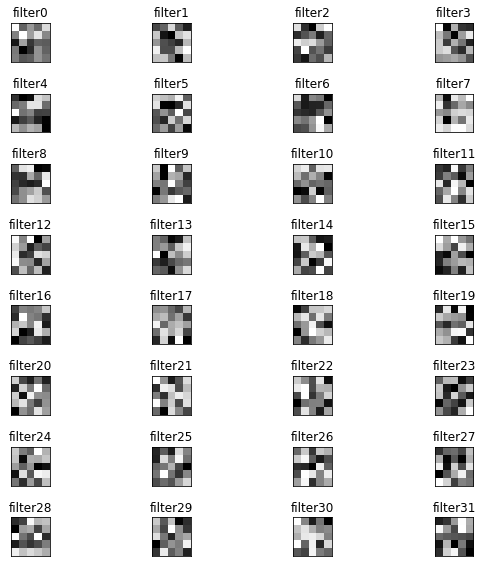

conv2d_3
(3, 3, 32, 64)


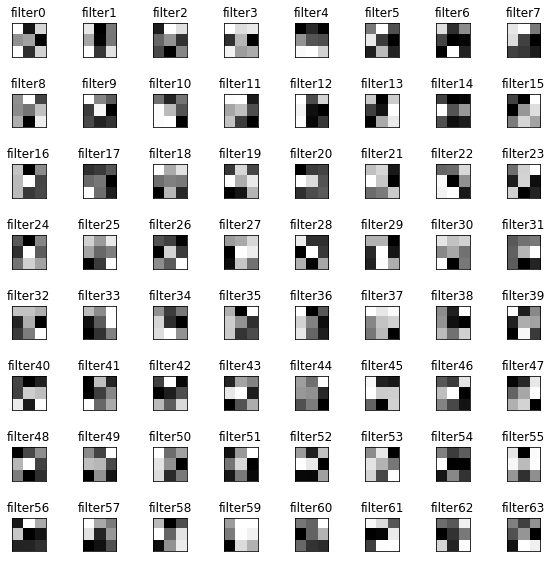

conv2d_4
(3, 3, 64, 64)


In [4]:
             # --------------------- TASK-1-PART-1---------------------#
    
        # --------------------------- Visualize Filters -----------------------------------#



def visualize_filters():
    model = baseline_model()
    conv_layer_cnt = 0;
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        print(layer.name)
        # get filter weights
        filters, biases = layer.get_weights()
        print(filters.shape)
        if conv_layer_cnt < 3:
            #print(filters)
            f_min, f_max = filters.min(), filters.max()
            filters = (filters - f_min) / (f_max - f_min)
            n_filters, ix = filters.shape[3], 1
            row, col = 0, 0
            if n_filters==32:
                row, col = 8, 4
            if n_filters==64:
                row, col = 8, 8
            if n_filters==128:
                row, col = 8, 6
            
            cnt = 0
            fig, ax = plt.subplots(row, col, figsize = (8,8))
            plt.tight_layout()
            for i in range(row):
                for j in range(col):
                    f = filters[:, :, :, cnt]
                    ax[i][j].set_xticks([])
                    ax[i][j].set_yticks([])
                    ax[i][j].set_title('filter'+ str(cnt))
                    ax[i][j].imshow(f[:, :, 0], cmap='gray')
                    cnt += 1
                    ix += 1
        # show the figure 
        plt.show()
        conv_layer_cnt += 1
        
visualize_filters()

In [0]:
    
                     # --------------------- PROBLEM-1-TASK-2 ----------------#
    

                #-------------------------- Feature Map -------------------------------#



In [5]:
# load dataset
X_train, y_train, X_test, y_test = data_loader()
# reshape data
X_train, y_train, X_test, y_test = reshape_data(X_train, y_train, X_test, y_test)
# prepare pixel data
X_train, X_test = prep_pixels(X_train, X_test)
# load the model
model_baseline = baseline_model()
history = model_baseline.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
model_baseline.summary()
predictions = model_baseline.predict(X_test)
preds_classes = np.argmax(predictions, axis=-1)
print(preds_classes)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1400 - acc: 0.9566
Epoch 2/5
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0438 - acc: 0.9869
Epoch 3/5
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0309 - acc: 0.9903
Epoch 4/5
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0238 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0179 - acc: 0.9942
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)    

(0, 28, 28, 1)
 h  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]  h  8
(28, 28)


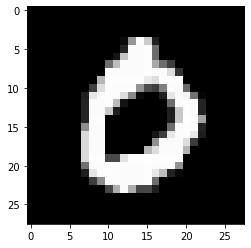

(28, 28)


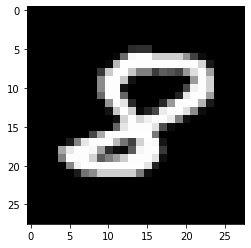

In [18]:
input_shape = (28, 28, 1)
data = np.empty((0,)+input_shape)
print(data.shape)

for i in range(0, preds_classes.shape[0]):
    if(preds_classes[i] == np.argmax(y_test[i]) and preds_classes[i] == 0):
        data = np.append(data, [X_test[i]], 0)
        break
for i in range(0, preds_classes.shape[0]):
    if(preds_classes[i] == np.argmax(y_test[i]) and preds_classes[i] == 8):
         print(' h ', y_test[i], ' h ', preds_classes[i])
         data = np.append(data, [X_test[i]], 0)
         break
for i in range(0, data.shape[0]): 
     c = data[i,:,:,0]
     print(c.shape)
     plt.imshow(data[i,:,:,0], cmap="gray") # data bujhte hobe
     plt.show()



In [19]:
        
  


#---------------------- Summary check -------------#
model_baseline.summary()
#--------------------------------------------------#




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [22]:
feature_map_model = Model(inputs=model_baseline.input, outputs=model_baseline.layers[3].output)
feature_map_model.summary()

second_convolutional_feature_map_model = Model(inputs=model_baseline.input,
                                   outputs=model_baseline.layers[1].output)

first_convolutional_feature_map_model = Model(inputs=model_baseline.input,
                                  outputs=model_baseline.layers[0].output)

first_maxpool_feature_map_model = Model(inputs=model_baseline.input,
                                     outputs=model_baseline.layers[2].output)

first_convolutional_feature_map = first_convolutional_feature_map_model.predict(data)
second_convolutional_feature_map = second_convolutional_feature_map_model.predict(data)
first_maxpool_feature_map = first_maxpool_feature_map_model.predict(data)
feature_map = feature_map_model.predict(data)

print(data.shape)
print(first_convolutional_feature_map.shape)
print(second_convolutional_feature_map.shape)



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
Total params: 44,960
Trainable params: 44,960
Non-trainable params: 0
_________________________________________________________________
(2, 28, 28, 1)
(2, 24, 24, 32)
(2, 20, 20, 32)


In [26]:
for i in range(len(model_baseline.layers)):
	layer = model_baseline.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)
 
def find_row_col(n_filters):
  row, col = 0, 0
  if n_filters==32:
    row, col = 4, 8
  if n_filters==64:
    row, col = 8, 8
  if n_filters==128:
     row, col = 8, 6
  return row, col

no_of_image = data.shape[0]


0 conv2d_5 (?, 24, 24, 32)
1 conv2d_6 (?, 20, 20, 32)
3 conv2d_7 (?, 8, 8, 64)
4 conv2d_8 (?, 6, 6, 64)


first_convolutional_feature_map 
first_convolutional_feature_map  0


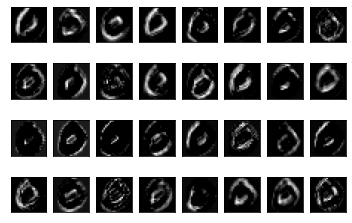

first_convolutional_feature_map  1


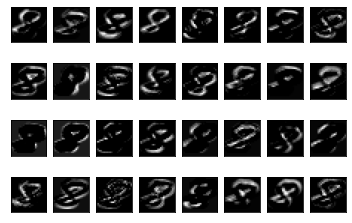

In [27]:
print('first_convolutional_feature_map ')           
for i in range(no_of_image):
  no_of_filter = first_convolutional_feature_map.shape[3]
  row, col = find_row_col(no_of_filter)
  ix = 1
  print("first_convolutional_feature_map ", i)
  for _ in range(row):
	  for _ in range(col):
		  # specify subplot and turn of axis
		  ax = pyplot.subplot(row, col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  pyplot.imshow(first_convolutional_feature_map[i, :, :, ix-1], cmap='gray')
		  ix += 1
  # show the figure
  pyplot.show()



second_convolutional_feature_map  
second_convolutional_feature_map   0


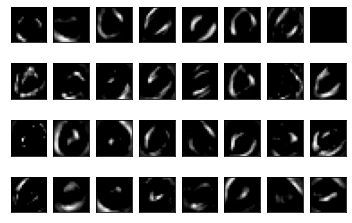

second_convolutional_feature_map   1


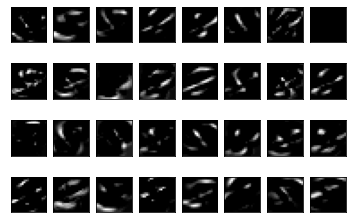

In [28]:

print('second_convolutional_feature_map  ')           
for i in range(no_of_image):
  no_of_filter = second_convolutional_feature_map .shape[3]
  row, col = find_row_col(no_of_filter)
  ix = 1
  print("second_convolutional_feature_map  ", i)
  for _ in range(row):
	  for _ in range(col):
		  # specify subplot and turn of axis
		  ax = pyplot.subplot(row, col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  pyplot.imshow(second_convolutional_feature_map [i, :, :, ix-1], cmap='gray')
		  ix += 1
  # show the figure
  pyplot.show()



first_maxpool_feature_map  
first_maxpool_feature_map   0


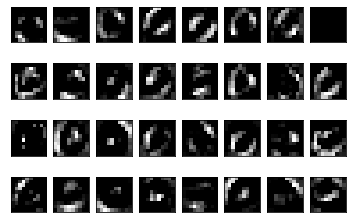

first_maxpool_feature_map   1


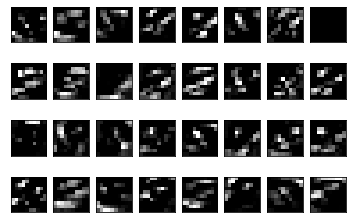

In [29]:
print('first_maxpool_feature_map  ')           
for i in range(no_of_image):
  no_of_filter = first_maxpool_feature_map .shape[3]
  row, col = find_row_col(no_of_filter)
  ix = 1
  print("first_maxpool_feature_map  ", i)
  for _ in range(row):
	  for _ in range(col):
		  # specify subplot and turn of axis
		  ax = pyplot.subplot(row, col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  pyplot.imshow(first_maxpool_feature_map [i, :, :, ix-1], cmap='gray')
		  ix += 1
  # show the figure
  pyplot.show()


feature_map  
feature_map   0


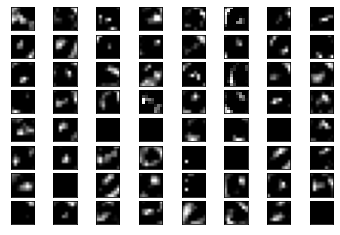

feature_map   1


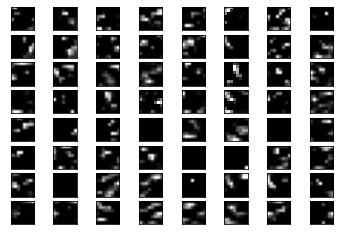

In [30]:
print('feature_map  ')           
for i in range(no_of_image):
  no_of_filter = feature_map .shape[3]
  row, col = find_row_col(no_of_filter)
  ix = 1
  print("feature_map  ", i)
  for _ in range(row):
	  for _ in range(col):
		  # specify subplot and turn of axis
		  ax = pyplot.subplot(row, col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  pyplot.imshow(feature_map [i, :, :, ix-1], cmap='gray')
		  ix += 1
  # show the figure
  pyplot.show()



In [0]:

                     # --------------------- PROBLEM-1-TASK-3 ----------------#

data = numpy.empty((0,)+input_shape)

predictions = model.predict(x_test)
for i in range(0, predictions.shape[0]):
  if(numpy.argmax(predictions[i]) == numpy.argmax(y_test[i]) and numpy.argmax(y_test[i]) == 1):
    data = numpy.append(data, [x_test[i]], 0)
    break

print(data.shape, " ", x_train.shape)

datagen = ImageDataGenerator()

plt.imshow(data[0, :, :,0], cmap="gray")
plt.xticks(numpy.arange(0, 28+1, 2.0))
plt.yticks(numpy.arange(0, 28+1, 2.0))
plt.show()

datagen.fit(x_train)

transform_parameters_left = { 'ty': 2}
x_transform = datagen.apply_transform(data[0], transform_parameters_left)
plt.imshow(x_transform[ :, :,0], cmap="gray")
plt.xticks(numpy.arange(0, 28+1, 2.0))
plt.yticks(numpy.arange(0, 28+1, 2.0))
plt.show()

data = numpy.append(data, [x_transform], 0)
print(data.shape)

transform_parameters_right = { 'ty': -2}
x_transform = datagen.apply_transform(data[0], transform_parameters_right)
plt.imshow(x_transform[ :, :,0], cmap="gray")
plt.xticks(numpy.arange(0, 28+1, 2.0))
plt.yticks(numpy.arange(0, 28+1, 2.0))
plt.show()

data = numpy.append(data, [x_transform], 0)
print(data.shape)

y_pred = model.predict(data)

print("Prediction for vanilla 1: ", numpy.argmax(y_pred[0])," ", numpy.max(y_pred[0]))
print("Prediction for left shifted 1: ", numpy.argmax(y_pred[1])," ", numpy.max(y_pred[1]))
print("Prediction for right shifted 1: ", numpy.argmax(y_pred[2])," ", numpy.max(y_pred[2]))

                #--------------------------   -------------------------------#


                     # --------------------- PROBLEM-2-TASK-1 ----------------#


In [32]:
x_map = np.load("/x.npy")
x_adv = np.load("/x_adv.npy")
print(x_map.shape)
print(x_adv.shape)

FileNotFoundError: ignored